### simple linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

In [10]:
df.rename(columns={'package':'package_lpa'}, inplace=True)

In [11]:
df.head()

,cgpa,package_lpa
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


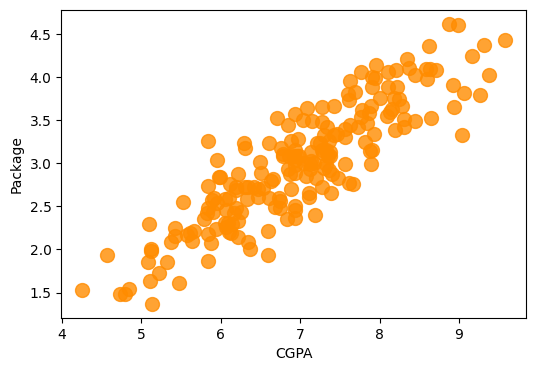

In [13]:
# plotting the data points
plt.figure(figsize=(6,4))
plt.scatter(df['cgpa'], df['package_lpa'], color = 'darkorange', alpha = 0.8, s = 100)
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [ ]:
# feature(x) and target(y)
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [22]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
# here test data size is 20%.

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train) # fit() method trains the model, hence passing the training parts of dataset.

LinearRegression()

# 👆

> <span style = 'color:orange'> This box shows that model is trained</span>

In [26]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [27]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package_lpa, dtype: float64

In [ ]:
# predict() method, as the name suggests will make predicitons
# the overall predition of whole testing dataframe
lr.predict(x_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [29]:
# predicting values individually
# index = 85
# cgpa = 4.79
# package = 1.48 LPA
lr.predict(x_test.iloc[5].values.reshape(1,1)) # because inputs are expected in 2d format

/Users/lucifer/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.77647803])

In [30]:
lr.predict(x_test.iloc[1].values.reshape(1,1)) 

/Users/lucifer/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

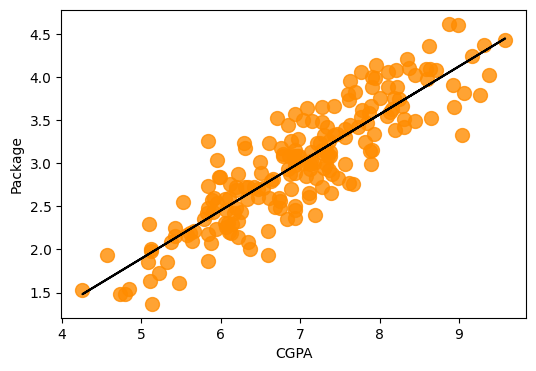

In [34]:
# the best fit line
plt.figure(figsize=(6,4))
plt.scatter(df['cgpa'], df['package_lpa'], color = 'darkorange', alpha = 0.8, s = 100)
plt.plot(x_train, lr.predict(x_train), color = 'k')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [35]:
# once the model is trained we can determine the slope(m) and itercept(b)
print(lr.coef_)            # slope
print(lr.intercept_)       # y-intercept / bias

[0.55795197]
-0.8961119222429144


In [38]:
y = (lr.coef_)* 9.15 + (lr.intercept_)
y
# works the same as lr.predit()

array([4.20914863])